Predict how many medals the country is going to win in the next Olympic games.

# Let's look at the data first

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv("teams.csv")
data.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


Simplify the dataset, this is a beginner exercise.

In [127]:
select_cols = ['team', 'year', 'athletes', 'age', 'medals', 'prev_medals']
data = data[select_cols]
data.head()

,team,year,athletes,age,medals,prev_medals
0,AFG,1964,8,22.0,0,0.0
1,AFG,1968,5,23.2,0,0.0
2,AFG,1972,8,29.0,0,0.0
3,AFG,1980,11,23.6,0,0.0
4,AFG,2004,5,18.6,0,0.0


## Clean the data

In [130]:
pd.isnull(data).sum()

team             0
year             0
athletes         0
age              0
medals           0
prev_medals    130
dtype: int64

In [132]:
# substitute NaNs with 0
#data = data.fillna(0)

# drop columns with NaNs
data = data.dropna()

In [134]:
# check that the command was correct
pd.isnull(data).sum()

team           0
year           0
athletes       0
age            0
medals         0
prev_medals    0
dtype: int64

In [136]:
data.columns

Index(['team', 'year', 'athletes', 'age', 'medals', 'prev_medals'], dtype='object')

Seems good now.

## Correlations and Histograms

We want to find strongly correlated features so that they work well with a linear regression model.

In [141]:
data.corr(numeric_only=True)['medals']

year          -0.034870
athletes       0.839909
age            0.023231
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

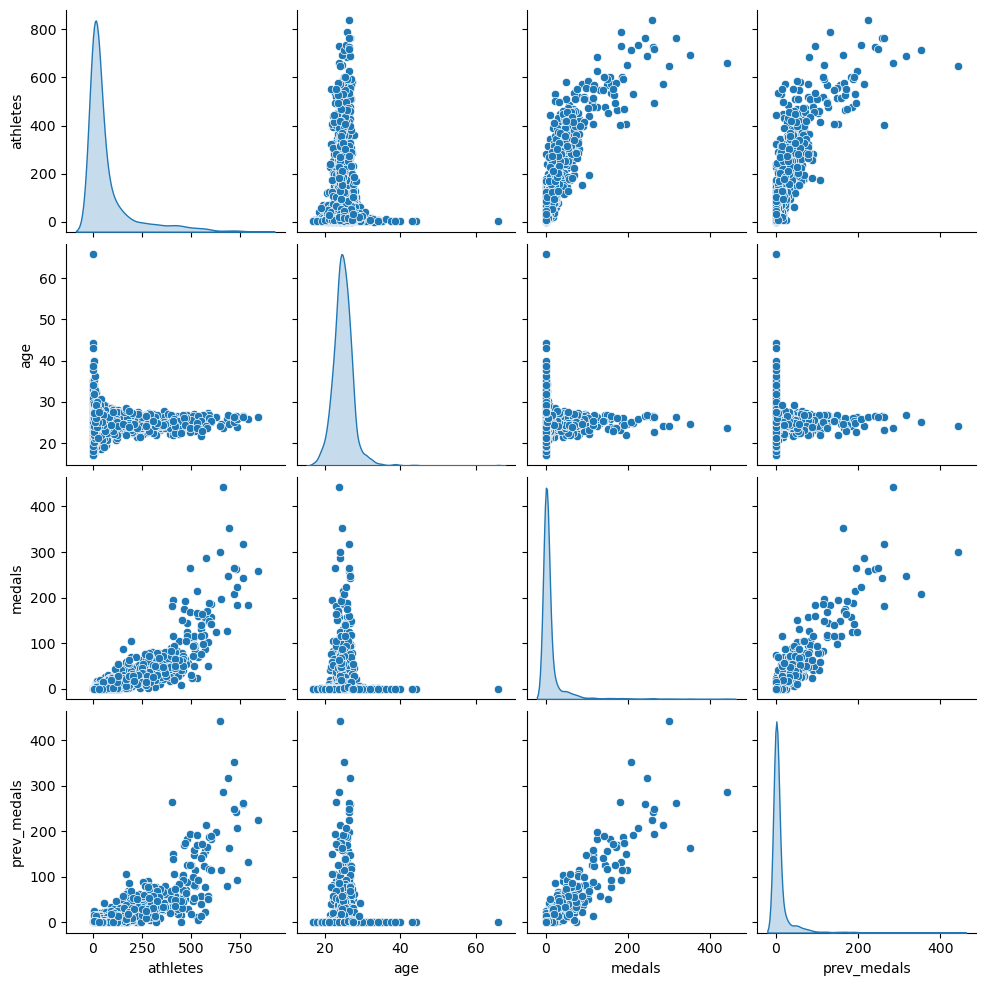

In [143]:
sns.pairplot(data, 
             x_vars=['athletes', 'age', 'medals', 'prev_medals'], 
             y_vars=['athletes', 'age', 'medals', 'prev_medals'],
             hue_order='team', diag_kind="kde")

<Axes: ylabel='Frequency'>

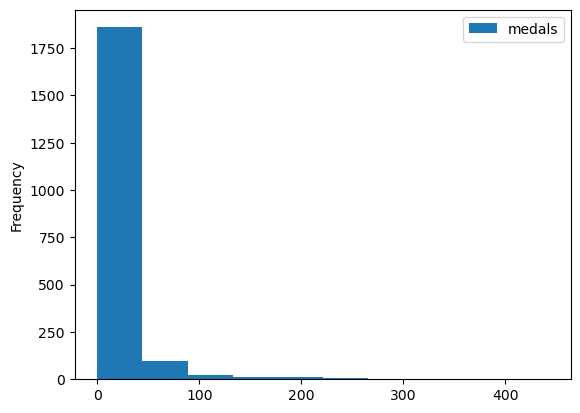

In [144]:
data.plot.hist(y='medals')

 Seems unbalanced, because there a few countries who did win most of the medals.

## Linear fit included

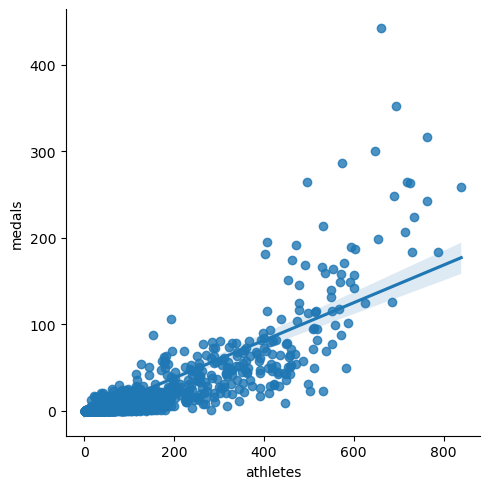

In [147]:
sns.lmplot(x='athletes', y='medals', data=data, fit_reg=True,)# ci=None)

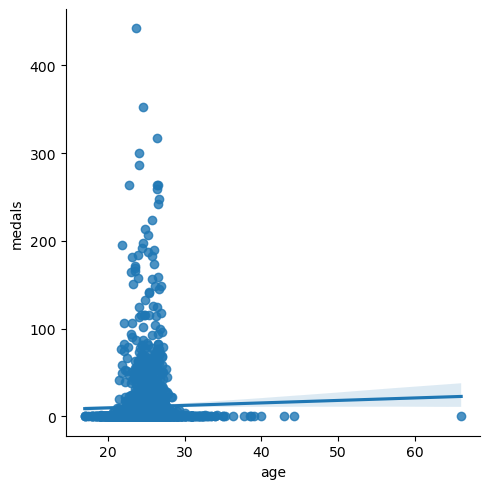

In [148]:
sns.lmplot(x='age', y='medals', data=data, fit_reg=True,)# ci=None)

# Train the model

## Split the data in training and testing

The data is a time series, i.e. it has a column with the year, so it's a good idea to split the data considering this. So that if we want to predict the medals won in 2012, the model doesn't have access to that data.

In [249]:
train = data[data["year"] < 2012].copy()
test = data[data["year"] >= 2012].copy()

In [251]:
print("The number of training examples is: ", train.shape)
print("The number of testing examples is: ", test.shape)
print("Fraction of tesing exmamples: ", round(test.shape[0]/data.shape[0], 3))

The number of training examples is:  (1609, 6)
The number of testing examples is:  (405, 6)
Fraction of tesing exmamples:  0.201


## Define the model

In [254]:
from sklearn.linear_model import LinearRegression

In [256]:
# define the class
model = LinearRegression()

In [258]:
# define the features (or inputs) and the target (or output)
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [260]:
model.fit(train[predictors], train[target])

LinearRegression()

In [262]:
# call the predict method of the LinearRegression class
pred = model.predict(test[predictors])

In [264]:
pred.shape

(405,)

## First look at the prediction

In [267]:
pred[:10]

array([-0.96122125, -1.17633261, -1.42503158, -1.71184673,  2.15562926,
        3.91463636, -1.71184673, -1.85525431,  0.36756313, -0.27777097])

**First observations:**
- numbers are negative
- numbers are not int \
Both the previous observations do not align with a prediction of number of medals

**Correct the model manually**

In [271]:
test["prediction"] = pred

In [273]:
test

,team,year,athletes,age,medals,prev_medals,prediction
6,AFG,2012,6,24.8,1,1.0,-0.961221
7,AFG,2016,3,24.7,0,1.0,-1.176333
24,ALB,2012,10,25.7,0,0.0,-1.425032
25,ALB,2016,6,23.7,0,0.0,-1.711847
37,ALG,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...
2111,YEM,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,2012,9,27.3,0,4.0,1.505767


In [275]:
test.loc[test['prediction'] < 0 , 'prediction'] = 0
test

,team,year,athletes,age,medals,prev_medals,prediction
6,AFG,2012,6,24.8,1,1.0,0.000000
7,AFG,2016,3,24.7,0,1.0,0.000000
24,ALB,2012,10,25.7,0,0.0,0.000000
25,ALB,2016,6,23.7,0,0.0,0.000000
37,ALG,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...
2111,YEM,2016,3,19.3,0,0.0,0.000000
2131,ZAM,2012,7,22.6,0,0.0,0.000000
2132,ZAM,2016,7,24.1,0,0.0,0.000000
2142,ZIM,2012,9,27.3,0,4.0,1.505767


In [277]:
test.prediction = test.prediction.round()
test

,team,year,athletes,age,medals,prev_medals,prediction
6,AFG,2012,6,24.8,1,1.0,0.0
7,AFG,2016,3,24.7,0,1.0,0.0
24,ALB,2012,10,25.7,0,0.0,0.0
25,ALB,2016,6,23.7,0,0.0,0.0
37,ALG,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...
2111,YEM,2016,3,19.3,0,0.0,0.0
2131,ZAM,2012,7,22.6,0,0.0,0.0
2132,ZAM,2016,7,24.1,0,0.0,0.0
2142,ZIM,2012,9,27.3,0,4.0,2.0


# Evaluate the model by looking at the metrics

In [280]:
from sklearn.metrics import mean_absolute_error

In [282]:
mae = mean_absolute_error(test['medals'], test['prediction'])
mae

3.2987654320987656

It means that on average we were at 3.3 medals distance from the actual value. Is it good or not?

In [285]:
data.describe().medals

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

The error is below the standard deviation, so that's good.

**Let's look how the predictions are team by team.**

In [289]:
# country with many athletes
test[test['team'] == 'USA']

,team,year,athletes,age,medals,prev_medals,prediction
2053,USA,2012,689,26.7,248,317.0,285.0
2054,USA,2016,719,26.4,264,248.0,236.0


Not super far off, percentage-wise it's 5-10%.

In [297]:
# country with not as many athletes
test[test['team'] == 'IND']

,team,year,athletes,age,medals,prev_medals,prediction
907,IND,2012,95,26.0,6,3.0,7.0
908,IND,2016,130,26.1,2,6.0,12.0


Here we didn't do so much well. So for countries with many medals there's a good match, for countries where the medals are not many then the error is high.

In [337]:
test[test['athletes']==16]

,team,year,athletes,age,medals,prev_medals,prediction
1544,PER,2012,16,24.3,0,0.0,0.0
1919,TJK,2012,16,27.2,1,2.0,1.0
2015,UGA,2012,16,24.1,1,0.0,0.0


In [363]:
test['error'] = (test['medals'] - test['prediction']).abs()

In [367]:
error_by_team = test.groupby('team').error.mean()

In [369]:
# otherwise you can also do 
# erros = (test['medals'] - test['prediction']).abs()
# error_by_team = errors.groupby(test['team']).mean()

In [371]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Name: error, Length: 204, dtype: float64

In [373]:
medals_by_team = test.groupby('team').medals.mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [381]:
error_ratio = error_by_team / medals_by_team

In [385]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [387]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [389]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

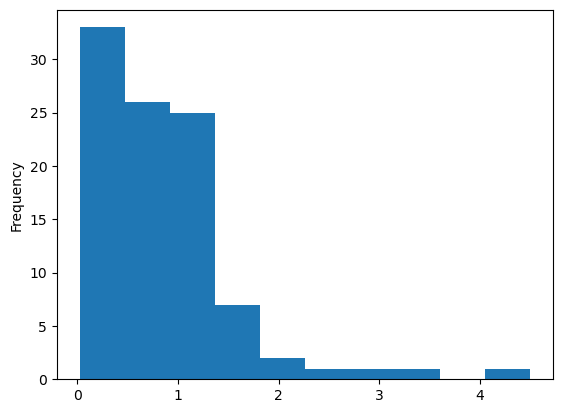

In [391]:
error_ratio.plot.hist()

If we want to make prediction for a country that earns several medals, the model will go well. Otherwise the model needs to be revised.

In [394]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

# How to improve the model accuracy and performance?

Ideas:
- add more predictors to the model
- try different ML models (random forest, neural networks)
- summarize the athletes.csv data in a different way. How about predicting if a specific athlete will win a medal? And then figure out how many medals that country will win.
- measure the error more predictably
- train model for different types of countries: low vs high number of medals